## Create a limited extrapolation for refractive index

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import materials

In [2]:
from scipy.constants import pi, c, epsilon_0
nm = 1e-9
um = 1e-6
mm = 1e-3
ps = 1e-12
fs = 1e-15
GHz = 1e9
THz = 1e12

In [46]:
wl_start = 10*nm
wl_stop = 10*um
wl_step = 10*nm
wl = np.arange(wl_start, wl_stop, wl_step)

(1.0, 4.0)

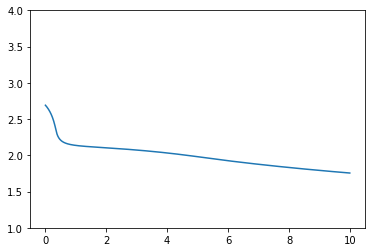

In [76]:
wtrans1 = 350*nm
wtrans2 = 5*um
n_low = 1
n_high = 3
n_trans1 = materials.refractive_index('LT_MgO_e', wtrans1/um)
n_trans2 = materials.refractive_index('LT_MgO_e', wtrans2/um)
slope_trans1 = (materials.refractive_index('LT_MgO_e', wtrans1/um) - materials.refractive_index('LT_MgO_e', (wtrans1-1*nm)/um))/(1*nm)
slope_trans2 = (materials.refractive_index('LT_MgO_e', wtrans2/um) - materials.refractive_index('LT_MgO_e', (wtrans2-1*nm)/um))/(1*nm)
def n_func(wl):
    if wtrans1 <= wl <= wtrans2:
        n = materials.refractive_index('LT_MgO_e', wl/um)
    elif wl<=wtrans1:
        a = n_trans1
        c = abs(slope_trans1) / (n_high - a)
        b = n_high*c
        x = wtrans1 - wl
        n = (a + b*x)/(1 + c*x)
    else:
        a = n_trans2
        c = slope_trans2 / (n_low - a)
        b = n_low*c
        x = wl - wtrans2
        n = (a + b*x)/(1 + c*x)
    return n

nLN = np.zeros_like(wl)
for k in range(wl.size):
    nLN[k] = n_func(wl[k])
    
plt.plot(wl/um, nLN)
plt.ylim([1,4])